## Imports

In [1]:
# Imports

#General
import numpy as np
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

## Get filenames

In [25]:
# Get files in data path
path='BirdSound'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 450 audio files in BirdSound


## Prepare labels from filenames

In [26]:
labels =[]
classes=['Avocet','Coot','Crake','Crane', 'Dove','Gallinule', 
         'Grebe','Grouse','Lapwing','Nightjar','Oystercatcher','Pheasant',
         'Pigeon','Plover','Quail','Rail','Sandpiper','Stilt','Swift','Turaco']

color_dict={'Avocet':'blue','Coot':'magenta','Crake':'magenta','Crane':'magenta', 'Dove':'magenta',
         'Gallinule':'magenta','Grebe':'magenta','Grouse':'magenta','Lapwing':'magenta','Nightjar':'magenta',
         'Oystercatcher':'magenta','Pheasant':'magenta','Pigeon':'magenta','Plover':'magenta',
         'Quail':'magenta','Rail':'magenta','Sandpiper':'magenta','Stilt':'magenta','Swift':'magenta',
         'Turaco':'magenta'}

color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

## Encode Labels

In [27]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

20 classes: Avocet, Coot, Crake, Crane, Dove, Gallinule, Grebe, Grouse, Lapwing, Nightjar, Oystercatcher, Pheasant, Pigeon, Plover, Quail, Rail, Sandpiper, Stilt, Swift, Turaco


## Parameters for MFCC

In [28]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

## Function to Calculate Audio Features: MFCC

In [29]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [ ]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 450 = BirdSound/Gallinule/XC131319 - Common Gallinule - Gallinula galeata.wav
get 2 of 450 = BirdSound/Gallinule/XC465599 - Common Gallinule - Gallinula galeata cachinnans.wav
get 3 of 450 = BirdSound/Gallinule/XC452961 - Common Gallinule - Gallinula galeata.wav
get 4 of 450 = BirdSound/Gallinule/XC45353 - Spot-flanked Gallinule - Porphyriops melanops crassirostris.wav
get 5 of 450 = BirdSound/Gallinule/XC91834 - Spot-flanked Gallinule - Porphyriops melanops.wav
get 6 of 450 = BirdSound/Gallinule/XC414334 - Common Gallinule - Gallinula galeata.wav
get 7 of 450 = BirdSound/Gallinule/XC368531 - Common Gallinule - Gallinula galeata.wav
get 8 of 450 = BirdSound/Gallinule/XC37123 - Purple Gallinule - Porphyrio martinica.wav
get 9 of 450 = BirdSound/Gallinule/XC7979 - Common Gallinule - Gallinula galeata.wav
get 10 of 450 = BirdSound/Gallinule/XC246282 - Common Gallinule - Gallinula galeata.wav
get 11 of 450 = BirdSound/Gallinule/XC384693 - Common Gallinule - Gallinula galeata.wav
g

get 95 of 450 = BirdSound/Crane/XC216976 - Common Crane - Grus grus.wav
get 96 of 450 = BirdSound/Crake/XC364028 - Rufous-faced Crake - Laterallus xenopterus.wav
get 97 of 450 = BirdSound/Crake/XC15483 - Rufous-faced Crake - Laterallus xenopterus.wav
get 98 of 450 = BirdSound/Crake/XC270595 - Chestnut-headed Crake - Anurolimnas castaneiceps.wav
get 99 of 450 = BirdSound/Crake/XC237988 - Chestnut-headed Crake - Anurolimnas castaneiceps castaneiceps.wav
get 100 of 450 = BirdSound/Crake/XC13469 - Black-banded Crake - Laterallus fasciatus~1.wav
get 101 of 450 = BirdSound/Crake/XC224864 - Rusty-flanked Crake - Laterallus levraudi.wav
get 102 of 450 = BirdSound/Crake/XC69265 - Spotless Crake - Porzana tabuensis.wav
get 103 of 450 = BirdSound/Crake/XC288426 - Grey-breasted Crake - Laterallus exilis.wav
get 104 of 450 = BirdSound/Crake/XC218852 - Russet-crowned Crake - Laterallus viridis.wav
get 105 of 450 = BirdSound/Crake/XC13469 - Black-banded Crake - Laterallus fasciatus.wav
get 106 of 450

get 187 of 450 = BirdSound/Dove/XC17077 - Ruddy Ground Dove - Columbina talpacoti.wav
get 188 of 450 = BirdSound/Dove/XC74980 - Common Ground Dove - Columbina passerina.wav
get 189 of 450 = BirdSound/Dove/XC300695 - Ring-necked Dove - Streptopelia capicola somalica.wav
get 190 of 450 = BirdSound/Dove/XC209306 - Blue Ground Dove - Claravis pretiosa.wav
get 191 of 450 = BirdSound/Coot/XC14381 - American Coot - Fulica americana~1.wav
get 192 of 450 = BirdSound/Coot/XC287245 - Andean Coot - Fulica ardesiaca.wav
get 193 of 450 = BirdSound/Coot/XC139909 - American Coot - Fulica americana.wav
get 194 of 450 = BirdSound/Coot/XC48557 - Red-fronted Coot - Fulica rufifrons.wav
get 195 of 450 = BirdSound/Coot/XC175423 - Eurasian Coot - Fulica atra.wav
get 196 of 450 = BirdSound/Coot/XC57425 - American Coot - Fulica americana.wav
get 197 of 450 = BirdSound/Coot/XC160661 - American Coot - Fulica americana.wav
get 198 of 450 = BirdSound/Coot/XC37846 - American Coot - Fulica americana.wav
get 199 of 4

## Standardization: Zero-Mean and Unit-Variance

In [8]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (25, 13)


## t-SNE

In [9]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import numpy as np
from glob import glob
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [10]:
labels = np.array(classes_num)
#labels_ids = np.array(classes_num)
labels = np.array(labels)
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [11]:
def visualize_scatter_with_images(X_2d_data, images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()


In [12]:
def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    plt.legend(loc='best')

In [13]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(scaled_feature_vectors)
X_embedded.shape

(25, 2)

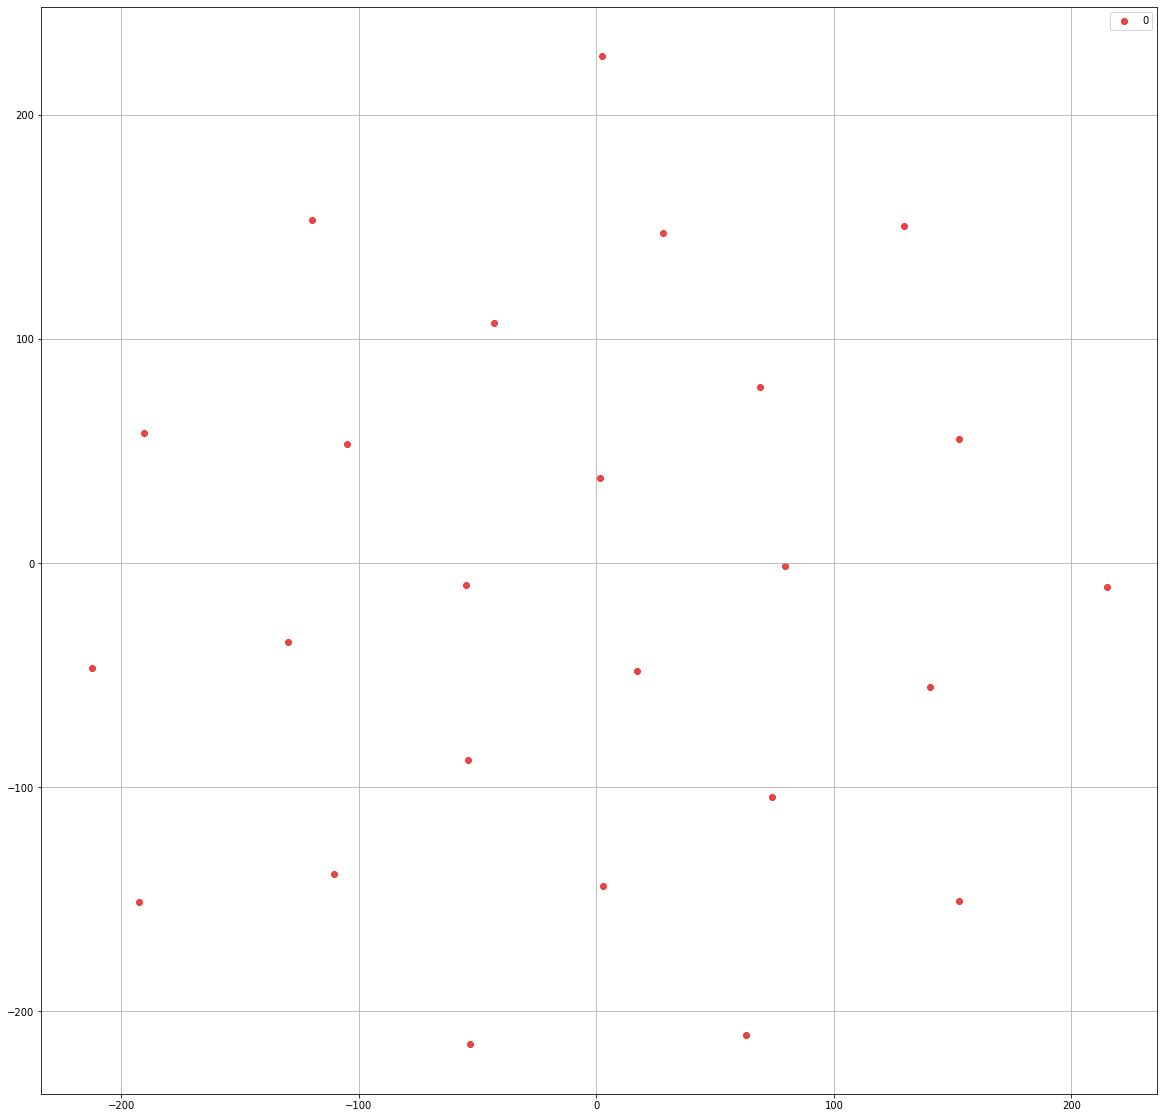

In [14]:
visualize_scatter(X_embedded,label_ids)

## Train and Test Sets

In [15]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [16]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (18, 13)
test_set shape: (7, 13)
train_classes shape: (18,)
test_classes shape: (7,)


## 1.kNN Classification

In [17]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [18]:
# kNN
model_knn.fit(train_set, train_classes);

## Load Test Data

TestSound

In [19]:
# Get files in data path
path='TestSound2/'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 25 audio files in TestSound2/


In [20]:
labels =[]
classes=['Test']



color_dict={'Test':'blue'}

color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

## Encode Labels¶

In [21]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

1 classes: Test


## Parameters for MFCC

In [22]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

## Function to Calculate Audio Features: MFCC

In [23]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [24]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 25 = TestSound2/XC141694 - Pied Avocet - Recurvirostra avosetta.wav
get 2 of 25 = TestSound2/XC2479 - Andean Avocet - Recurvirostra andina.wav
get 3 of 25 = TestSound2/XC333699 - Pied Avocet - Recurvirostra avosetta.wav
get 4 of 25 = TestSound2/XC199264 - Pied Avocet - Recurvirostra avosetta.wav
get 5 of 25 = TestSound2/XC133080 - American Avocet - Recurvirostra americana.wav
get 6 of 25 = TestSound2/XC188266 - Pied Avocet - Recurvirostra avosetta.wav
get 7 of 25 = TestSound2/XC325032 - Pied Avocet - Recurvirostra avosetta.wav
get 8 of 25 = TestSound2/XC313293 - Pied Avocet - Recurvirostra avosetta.wav
get 9 of 25 = TestSound2/XC325032 - Pied Avocet - Recurvirostra avosetta (1).wav
get 10 of 25 = TestSound2/XC304644 - American Avocet - Recurvirostra americana.wav
get 11 of 25 = TestSound2/XC2474 - Andean Avocet - Recurvirostra andina.wav
get 12 of 25 = TestSound2/XC281050 - Pied Avocet - Recurvirostra avosetta.wav
get 13 of 25 = TestSound2/XC145135 - Pied Avocet - Recurvirostr

## Standardization: Zero-Mean and Unit-Variance

In [25]:
# Scale features using Standard Scaler
scaler = StandardScaler()
testing_set = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",testing_set.shape)

Feature vectors shape: (25, 13)


In [26]:
# Check Set Shapes
print("testing_set shape:",testing_set.shape)
print("testing_classes shape:",classes_num.shape)

testing_set shape: (25, 13)
testing_classes shape: (25,)


## Prediction Using Test Set

In [52]:
# Predict using the Test Set
predicted_labels = model_knn.predict(testing_set)
predicted_labels

array([ 0,  8,  6,  0,  0,  7,  0, 13,  0, 14,  0,  0,  0,  1, 15,  1,  1,
       11,  0,  0,  0,  0,  0,  0,  0])

In [127]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

predicted_labels = model_knn.predict(testing_set)

le = preprocessing.LabelEncoder()
le.fit(['Avocet','Coot','Crake','Crane', 'Dove','Gallinule', 
         'Grebe','Grouse','Lapwing','Nightjar','Oystercatcher','Pheasant',
         'Pigeon','Plover','Quail','Rail','Sandpiper','Stilt','Swift','Turaco'])
LabelEncoder()
list(le.classes_)
['amsterdam', 'paris', 'tokyo']
le.transform(['Avocet','Coot','Crake','Crane', 'Dove','Gallinule', 
         'Grebe','Grouse','Lapwing','Nightjar','Oystercatcher','Pheasant',
         'Pigeon','Plover','Quail','Rail','Sandpiper','Stilt','Swift','Turaco'])
list(le.inverse_transform(predicted_labels))

['Avocet',
 'Lapwing',
 'Grebe',
 'Avocet',
 'Avocet',
 'Grouse',
 'Avocet',
 'Plover',
 'Avocet',
 'Quail',
 'Avocet',
 'Avocet',
 'Avocet',
 'Coot',
 'Rail',
 'Coot',
 'Coot',
 'Pheasant',
 'Avocet',
 'Avocet',
 'Avocet',
 'Avocet',
 'Avocet',
 'Avocet',
 'Avocet']